In [1]:
import os

In [2]:
#Data annotation and renaming function
# This function renames images in a specified folder by adding a prefix and counting them.
# It returns the total number of images renamed.
# The images are sorted alphabetically before renaming.
# The function supports common image formats like jpg, jpeg, png, bmp, gif, and
def rename_and_count_images(folder_path, prefix):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)]
    image_files.sort()
    count = 0
    for idx, filename in enumerate(image_files, 1):
        old_path = os.path.join(folder_path, filename)
        new_filename = f"{prefix}_{idx}{os.path.splitext(filename)[1]}"
        new_path = os.path.join(folder_path, new_filename)
        os.rename(old_path, new_path)
        count += 1
    return count

In [3]:
# Renaming and counting images in the specified folders
# Faulty images renaming
Faulty=rename_and_count_images("/Users/reamy/Desktop/try/solar/faulty", "Faulty")
print(f"Total Faulty images renamed: {Faulty}")

Total Faulty images renamed: 114


In [4]:
# Non-Faulty images renaming
Non_Faulty=rename_and_count_images("/Users/reamy/Desktop/try/solar/non-faulty", "Non_Faulty")
print(f"Total Non-Faulty images renamed: {Non_Faulty}")

Total Non-Faulty images renamed: 114


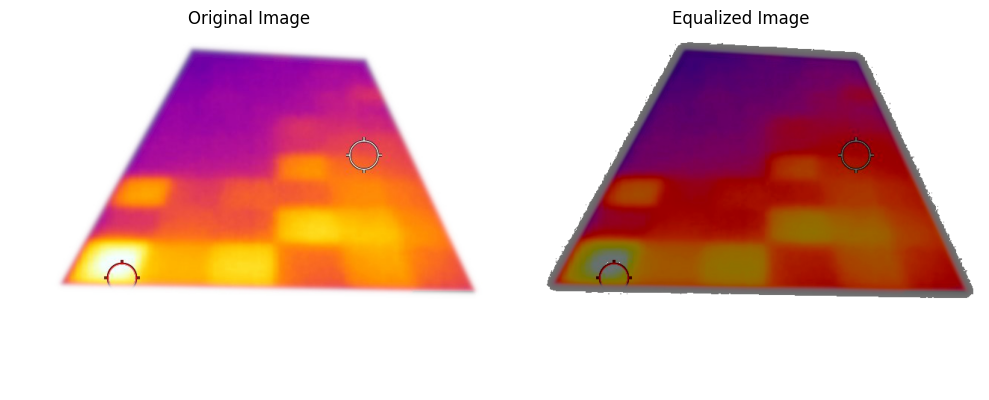

In [5]:
import cv2

import matplotlib.pyplot as plt

def histogram_equalization_pipeline_rgb(image_path):
    # Read the image in RGB
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to YUV color space
    yuv_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2YUV)
    
    # Apply histogram equalization on the Y channel
    yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])
    
    # Convert the image back to RGB color space
    equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2RGB)
    
    # Display the original and equalized images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(equalized_image)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "/Users/reamy/Desktop/try/solar/faulty/Faulty_20.jpg"
histogram_equalization_pipeline_rgb(image_path)